In [1]:
import pandas as pd
import matplotlib

In [10]:
age_raw = 'Resources/Age_Data.csv'
age_data = pd.read_csv(age_raw)
age_data.head()

,Unnamed: 0,Year,City,Age Range,Number in Range
0,0,2018,"Albany, NY",18 to 24 Years,21091
1,1,2018,"Albany, NY",75 Years & Over,5906
2,2,2018,"Albany, NY",45 to 54 Years,10514
3,3,2018,"Albany, NY",Under 5 Years,5491
4,4,2018,"Albany, NY",65 to 74 Years,6670


In [14]:
income_raw = 'Resources/Income_data.csv'
income_data = pd.read_csv(income_raw)
income_data = income_data[['Year', 'City', 'Median Income']]
income_data.head()

,Year,City,Median Income
0,2018,"Albany, NY",45500
1,2017,"Albany, NY",43790
2,2016,"Albany, NY",42335
3,2015,"Albany, NY",40949
4,2014,"Albany, NY",41099


In [24]:
avacado_raw = 'Resources/clean_avocado.csv'
avacado_data = pd.read_csv(avacado_raw)
avacado_data['region'].unique()

array(['Albany', 'Atlanta', 'Boise', 'Boston', 'California', 'Charlotte',
       'Chicago', 'Columbus', 'Denver', 'Detroit', 'Grand Rapids',
       'Great Lakes', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Midsouth', 'Nashville',
       'New York', 'Northern New England', 'Orlando', 'Philadelphia',
       'Pittsburgh', 'Plains', 'Portland', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'Spokane', 'St. Louis', 'Syracuse', 'Tampa'], dtype=object)

array([<AxesSubplot:title={'center':'2013'}, xlabel='City'>,
       <AxesSubplot:title={'center':'2014'}, xlabel='City'>,
       <AxesSubplot:title={'center':'2015'}, xlabel='City'>,
       <AxesSubplot:title={'center':'2016'}, xlabel='City'>,
       <AxesSubplot:title={'center':'2017'}, xlabel='City'>,
       <AxesSubplot:title={'center':'2018'}, xlabel='City'>], dtype=object)

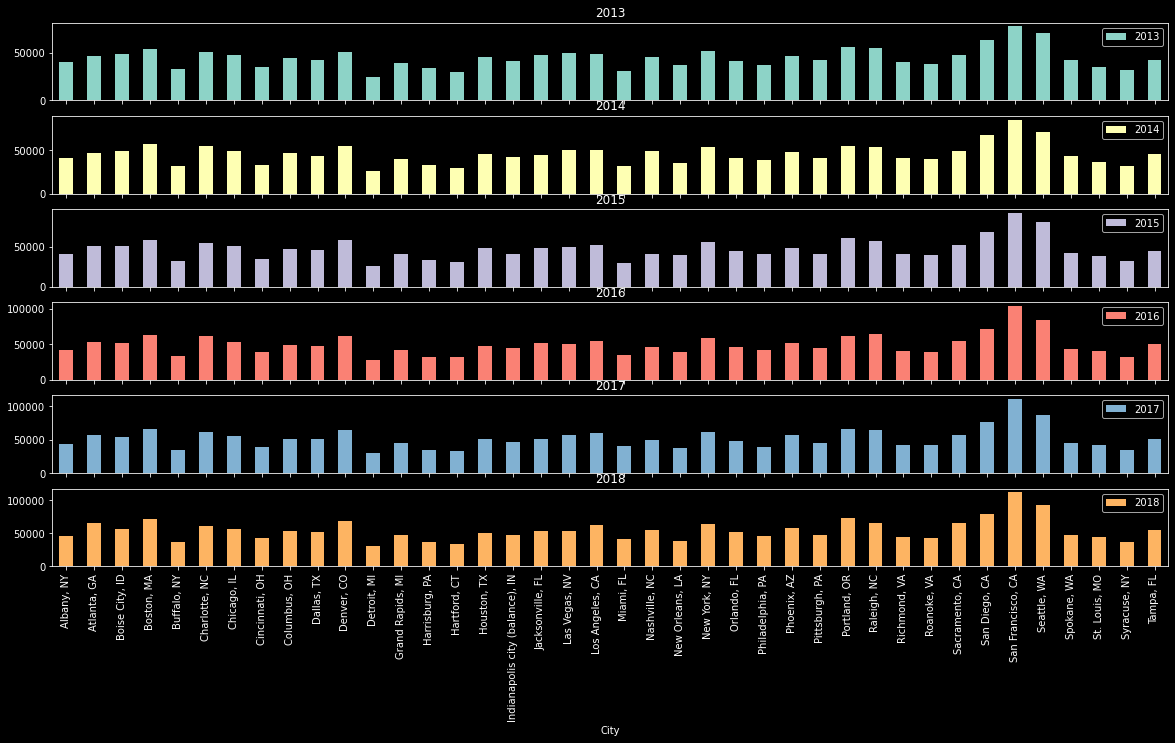

In [55]:
income_groupby = income_data.groupby(['Year', 'City', 'Median Income']).sum().reset_index().pivot(index='City', columns='Year').reset_index()
income_groupby.columns = ['City','2013', '2014', '2015','2016', '2017', '2018']
income_groupby.plot.bar('City', subplots=True, figsize=(20,10))
